# ***Análise Geoestatística***

In [ ]:
##Instalação da Biblioteca
!pip install pykrige

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys

###Acurária
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from   sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.svm import SVC

##Regressão Kriging
from pykrige.rk import RegressionKriging
from pykrige.ck import ClassificationKriging

%matplotlib inline

In [ ]:
#Acessar o arquivo via drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##Base de dados
df = pd.read_csv('/content/drive/MyDrive/TNC/RESULTADOS PARCIAIS/Produto 2/df_Iso_O_Cel.csv')
df= df.drop(columns='Unnamed: 0')
df.head()

,Vpd,Temp,Rh,O_Cel,Oxi,Oxi_Terzer,Briso_Isorix,predokrig_Isorg,long,lat
0,0.6075,24.795834,0.816428,36.587357,-4.73255,-4.73255,-5.505653,-4.29245,-70.134046,-8.631975
1,0.6075,24.795834,0.816428,36.587357,-4.73255,-4.73255,-5.505653,-4.29245,-70.149463,-8.640530
2,0.6075,24.795834,0.816428,36.587357,-4.73255,-4.73255,-5.505653,-4.29245,-70.141265,-8.638492
3,0.6075,24.795834,0.816428,36.587357,-4.73255,-4.73255,-5.505653,-4.29245,-70.137018,-8.650524
4,0.6075,24.795834,0.816428,36.587357,-4.73255,-4.73255,-5.505653,-4.29245,-70.145742,-8.645668


# **Regressão Linear Simples**

Neste processo foi utilizado a regressão linear simples para testar a relação dos parâmetros.

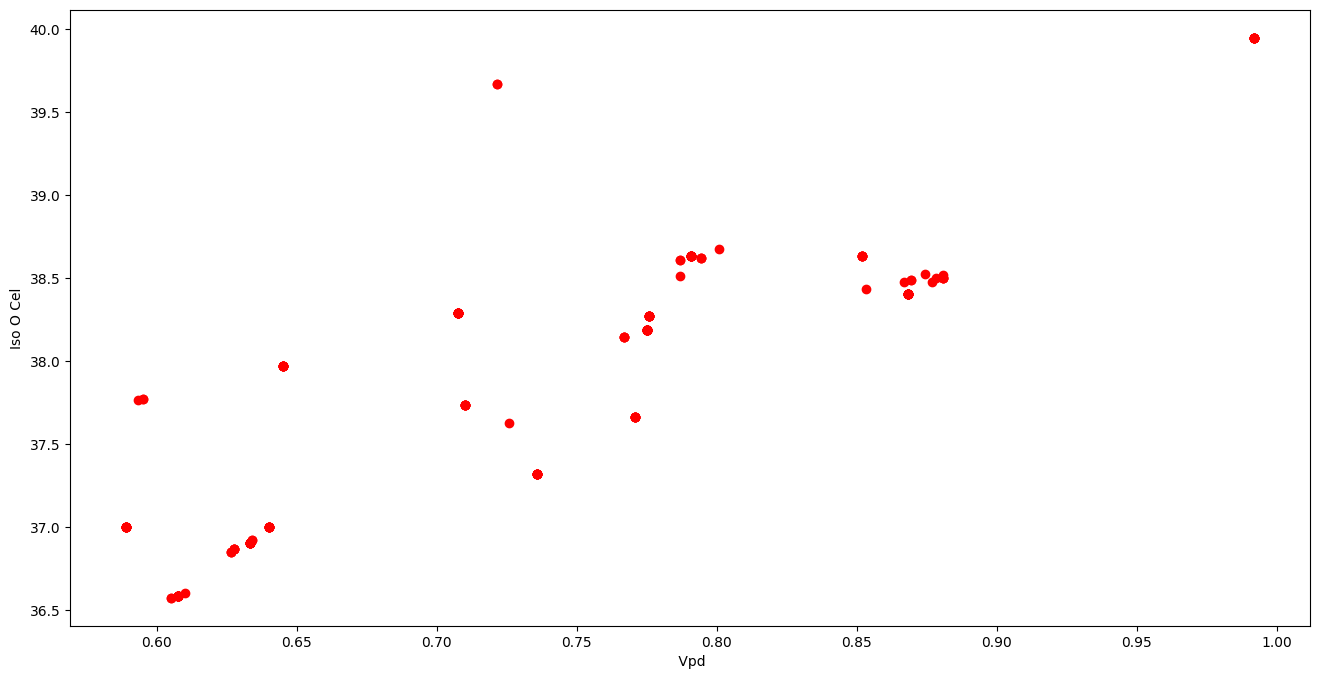

In [ ]:
##Scatter simmples
plt.figure(figsize = (16,8))
plt.scatter(
    x= df['Vpd'],
     y = df['O_Cel'],
    c='red')
plt.xlabel(" Vpd")
plt.ylabel("Iso O Cel")
plt.show()

In [ ]:
# Agora vamos criar o modelo para prever o quanto teremos o valor de Iso Cel
X = df['Vpd'].values.reshape(-1,1)
y = df['O_Cel'].values.reshape(-1,1)

In [ ]:
##modelo
reg = LinearRegression()
reg.fit(X, y)

print("O modelo é: Iso_cel = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

O modelo é: Iso_cel = 32.614 + 7.146X


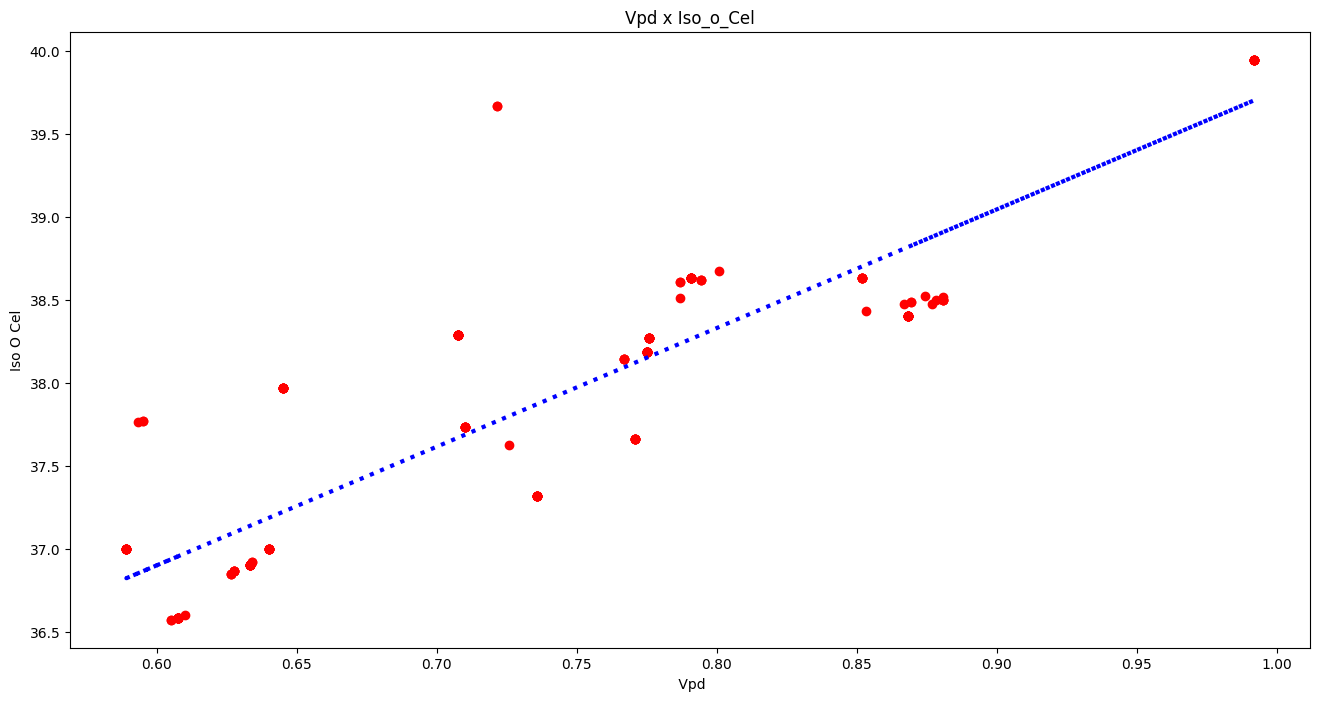

In [ ]:
# Agora vamos plotar o nosso modelo em cima dos dados e analisar se ele é bom, ruim, explica muito ou explica pouco o comportamento de nossos dados:
f_previsaoes = reg.predict(X)

plt.figure(figsize = (16,8))
plt.scatter(
    x= df['Vpd'],
     y = df['O_Cel'],
    c='red')


plt.plot(
    df['Vpd'],
    f_previsaoes,
    c='blue',
    linewidth=3,
    linestyle=':'
)

plt.title("Vpd x Iso_o_Cel")
plt.xlabel(" Vpd")
plt.ylabel("Iso O Cel")
plt.show()

In [ ]:
##Avaliando os resultados
X= df['Vpd']
y = df['O_Cel']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print('Ordinary Least Squares(OLS)',est2.summary())

Ordinary Least Squares(OLS)                             OLS Regression Results                            
Dep. Variable:                  O_Cel   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     760.9
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           2.42e-75
Time:                        18:27:56   Log-Likelihood:                -124.58
No. Observations:                 235   AIC:                             253.2
Df Residuals:                     233   BIC:                             260.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.6142   

Interpretação dos resultados
* https://jyotiyadav99111.medium.com/statistics-how-should-i-interpret-results-of-ols-3bde1ebeec01

# **Regressão Multipla**

* Referências
* https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c
* https://scikit-learn.org/stable/modules/linear_model.html


In [ ]:
# Semelhante ao que fizemos na regressão linear simples,
# vamos utilizar a biblioteca scikit-learn para construir nosso novo modelo com mais variáveis de entrada, onde o objetivo é prever o valor das O_Cel.

# Construindo o modelo:
Xs = df.drop(['O_Cel'], axis=1) ##primeiro precisamos excluir das variáveis que iremos utilizar para predição
y = df['O_Cel'].values.reshape(-1,1) ##nosso y deve ser a variável que queremos prever

In [ ]:
##Columns - parâmetros
Xs.columns

Index(['Vpd', 'Temp', 'Rh', 'Oxi', 'Oxi_Terzer', 'Briso_Isorix',
       'predokrig_Isorg', 'long', 'lat'],
      dtype='object')

In [ ]:
##predição
print('valor a ser predito', y[:2])

valor a ser predito [[36.58735657]
 [36.58735657]]


In [ ]:
##Modelo de Regression
reg = LinearRegression(copy_X=True, fit_intercept=True)
reg.fit(Xs, y)
accuracy = reg.score(Xs,y)

##Verificando resultados
print('interceptação y',reg.intercept_)
print('coeficiente de regressão linear',reg.coef_)
print('Avaliação de precisão:R² é de {:.4}'.format(accuracy))

interceptação y [60.95458309]
coeficiente de regressão linear [[-5.48494029e-01 -1.09217046e-02 -2.28016815e+01  4.81738580e-01
   4.81738580e-01 -2.87973709e-02  5.64231846e-02  6.25287407e-03
   7.11234134e-03]]
Avaliação de precisão:R² é de 0.9999


In [ ]:
##Columns - parâmetros para a função
Xs.columns

Index(['Vpd', 'Temp', 'Rh', 'Oxi', 'Oxi_Terzer', 'Briso_Isorix',
       'predokrig_Isorg', 'long', 'lat'],
      dtype='object')

In [ ]:
##Modelo de Regression
reg = LinearRegression(copy_X=True, fit_intercept=True)
reg.fit(Xs, y)

print("O modelo é: Iso_Cel = {:.5} + {:.5}*Vpd + {:.5}*Temp + {:.5}*Rh + {:.5}*Oxi +{:.5}*Oxi_Terzer+{:.5}*Briso_Isorix+{:.5}*predokrig_Isorg+{:.5}*long+{:.5}*lat".format(
    reg.intercept_[0],reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2],reg.coef_[0][3],reg.coef_[0][4],reg.coef_[0][5],reg.coef_[0][6],
    reg.coef_[0][7],reg.coef_[0][8]))

O modelo é: Iso_Cel = 60.955 + -0.54849*Vpd + -0.010922*Temp + -22.802*Rh + 0.48174*Oxi +0.48174*Oxi_Terzer+-0.028797*Briso_Isorix+0.056423*predokrig_Isorg+0.0062529*long+0.0071123*lat


In [ ]:
# Uma observação importante é que esse modelo não é capaz de explicar o
#  impacto individual de cada investimento, ou seja,
#  ele não consegue separar o valor de cada dimensão no resultado.

# Parecido com o que fizemos antes, vamos analisar a precisão do nosso modelo:
X = np.column_stack((df['Vpd'],df['Temp'],df['Rh'],df['Oxi'],df['Oxi_Terzer'],df['Briso_Isorix'],
                      df['predokrig_Isorg'], df['long'],df['lat']))
y = df['O_Cel']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()

print('Ordinary Least Squares(OLS)',est2.summary())

Ordinary Least Squares(OLS)                             OLS Regression Results                            
Dep. Variable:                  O_Cel   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.438e+05
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:34:48   Log-Likelihood:                 769.87
No. Observations:                 235   AIC:                            -1522.
Df Residuals:                     226   BIC:                            -1491.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.9546   

# **Kriking Regressor**

In [ ]:
# Uma observação importante é que esse modelo não é capaz de explicar o
#  impacto individual de cada investimento, ou seja,
#  ele não consegue separar o valor de cada dimensão no resultado.

# Parecido com o que fizemos antes, vamos analisar a precisão do nosso modelo:
X = np.column_stack((df['Vpd'],df['long'], df['lat']))
y = df['O_Cel']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()

print('Ordinary Least Squares(OLS)',est2.summary())

Ordinary Least Squares(OLS)                             OLS Regression Results                            
Dep. Variable:                  O_Cel   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     2143.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          2.96e-168
Time:                        19:34:58   Log-Likelihood:                 99.933
No. Observations:                 235   AIC:                            -191.9
Df Residuals:                     231   BIC:                            -178.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.9923   

In [ ]:
svr_model = SVR(C=0.1, gamma="auto")
rf_model = RandomForestRegressor(n_estimators=100)
lr_model = LinearRegression(copy_X=True, fit_intercept=True)

models = [svr_model, rf_model, lr_model]


# pegue os primeiros 5000 pois o kriging é intensivo em memória
p = X[:235, :-2]
x = X[:235, -2:] ##ndarray de (x, y) pontos. Precisa ser uma matriz (Ns, 2) correspondente a lon/lat,
                # por exemplo, krigagem de regressão 2d. matriz de Pontos, (x, y, z) pares de formas (N, 3) para krigagem 3d

target = df['O_Cel'][:235] ##Resultado que queremos prever

p_train, p_test, x_train, x_test, target_train, target_test = train_test_split(
    p, x, target, test_size=0.3, random_state=42
)

for m in models:
    print("=" * 40)
    print("regression model:", m.__class__.__name__)
    m_rk = RegressionKriging(regression_model=m, n_closest_points=10)
    m_rk.fit(p_train, x_train, target_train) ##Ajuste o método de regressão e também Krige o residual.
    predict = m_rk.predict(p_test,x_test)
    print("Regression Score: ", m_rk.regression_model.score(p_test, target_test)) ##Sobrecarregando o método de pontuação de regressão padrão.
    print("RK score: ", m_rk.score(p_test, x_test, target_test))
    print("Mean squared error: %.2f" % mean_squared_error(target_test, predict))
    print("Coefficient of determination: %.2f" % r2_score(target_test, predict))


regression model: SVR
Finished learning regression model
Finished kriging residuals
Regression Score:  0.3469533668881616
RK score:  0.9999360359539771
Mean squared error: 0.00
Coefficient of determination: 1.00
regression model: RandomForestRegressor
Finished learning regression model
Finished kriging residuals
Regression Score:  0.982554235546101
RK score:  0.9991430675271419
Mean squared error: 0.00
Coefficient of determination: 1.00
regression model: LinearRegression
Finished learning regression model
Finished kriging residuals
Regression Score:  0.7465603212497075
RK score:  0.9998780247627416
Mean squared error: 0.00
Coefficient of determination: 1.00


In [ ]:
##utilizando o melhor modelo
m_rk = RegressionKriging(regression_model=LinearRegression(), method= "universal", variogram_model= "linear")
m_rk.fit(p_train, x_train, target_train) ##Ajuste o método de regressão e também Krige o residual.
predict = m_rk.predict(p_test,x_test)

Finished learning regression model
Finished kriging residuals
n_closest_points will be ignored for UniversalKriging


In [ ]:
##Avaliando estatísticas do modelo
X = p_train
y = target_train

X2 = sm.add_constant(X)
est = sm.OLS(y, X2) ##regressão linear
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  O_Cel   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     555.2
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           3.26e-54
Time:                        19:35:52   Log-Likelihood:                -81.870
No. Observations:                 164   AIC:                             167.7
Df Residuals:                     162   BIC:                             173.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.5780      0.225    144.611      0.0

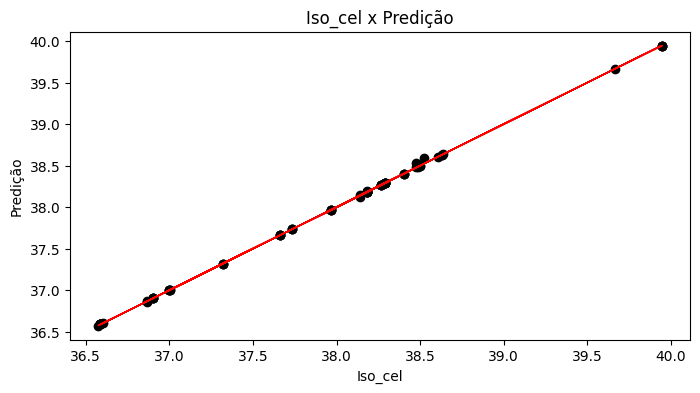

In [ ]:
###Gráfico de valor predito e valor original
# Agora vamos plotar o nosso modelo em cima dos dados e analisar se ele é bom, ruim, explica muito ou explica pouco o comportamento de nossos dados:
plt.figure(figsize = (8,4))

plt.scatter(target_test, predict, color="black")
plt.plot(target_test,target_test, color="red", linewidth=1)

plt.title("Iso_cel x Predição")
plt.xlabel("Iso_cel")
plt.ylabel("Predição")
plt.show()

# **Equação final**

In [ ]:
# Construindo o modelo:
Xs = df[['Vpd','Oxi','long','lat']] ##primeiro precisamos excluir das variáveis que iremos utilizar para predição
y = df['O_Cel'].values.reshape(-1,1) ##nosso y deve ser a variável que queremos prever

##Modelo de Regression
reg = LinearRegression(copy_X=True, fit_intercept=True)
reg.fit(Xs, y)

accuracy = reg.score(Xs,y)

##Verificando resultados
print('interceptação y',reg.intercept_)
print('coeficiente de regressão linear',reg.coef_)
print('Avaliação de precisão:R² é de {:.4}'.format(accuracy))

print("O modelo é: Iso_Cel = {:.5} + {:.5}*Vpd +{:.5}*Oxi + {:.5}*long + {:.5}*lat".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2],reg.coef_[0][3]))

interceptação y [37.90806121]
coeficiente de regressão linear [[ 4.90229195  1.16853008 -0.01072194 -0.05075532]]
Avaliação de precisão:R² é de 0.9923
O modelo é: Iso_Cel = 37.908 + 4.9023*Vpd +1.1685*Oxi + -0.010722*long + -0.050755*lat


In [ ]:
##Sumário Equação final
X3 = sm.add_constant(Xs)
esta = sm.OLS(y, X3)
esta2 = esta.fit()

print('Ordinary Least Squares(OLS)',esta2.summary())

In [ ]:
##Equação obtida a partir do modelo
37.908 + 4.9023*df['Vpd'][1] +1.1685*df['Oxi'][1] + -0.010722*df['long'][1] + -0.050755*df['lat'][1]

36.54685566346834

In [ ]:
##Criando predição
df_pred = []

##Função para predição
for i in range(len(df['O_Cel'])):
  predicao = 37.908 + 4.9023*df['Vpd'][i] +1.1685*df['Oxi'][i] + -0.010722*df['long'][i] + -0.050755*df['lat'][i]
  df_pred.append(predicao)

In [ ]:
##DataFrame de Predição
df_final = df[['O_Cel','long','lat']].reset_index()
df_final['predict'] = df_pred
df_final

,index,O_Cel,long,lat,predict
0,0,36.587357,-70.134046,-8.631975,36.546256
1,1,36.587357,-70.149463,-8.640530,36.546856
2,2,36.587357,-70.141265,-8.638492,36.546664
3,3,36.587357,-70.137018,-8.650524,36.547230
4,4,36.587357,-70.145742,-8.645668,36.547077
...,...,...,...,...,...
230,230,38.475586,-58.760240,-9.370850,38.489562
231,231,38.498100,-59.115780,-9.360130,38.603224
232,232,38.521076,-58.730440,-9.366230,38.555218
233,233,38.432217,-58.865700,-9.354210,38.395225


In [ ]:
df_final.to_csv('/content/drive/MyDrive/TNC/RESULTADOS PARCIAIS/Produto 2/data_frame_Predict.csv')

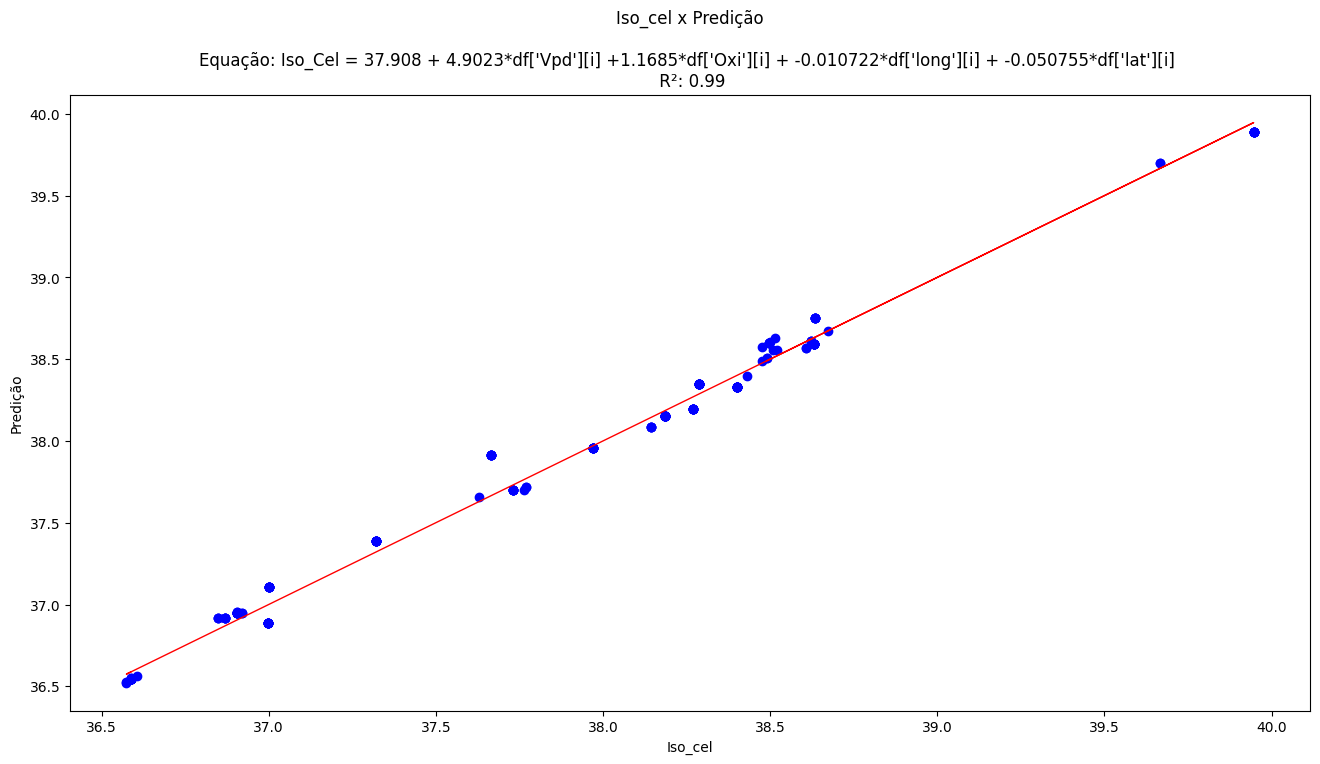

In [ ]:
###Gráfico predição
plt.figure(figsize = (16,8))

plt.scatter(df_final['O_Cel'], df_final['predict'], color="blue")
plt.plot(df_final['O_Cel'],df_final['O_Cel'], color="red", linewidth=1)
38.992 + 4.9926*df['Vpd'][i] + 0.076294*df['long'][i] + 0.025064*df['lat'][i]
plt.title("Iso_cel x Predição\n \nEquação: Iso_Cel = 37.908 + 4.9023*df['Vpd'][i] +1.1685*df['Oxi'][i] + -0.010722*df['long'][i] + -0.050755*df['lat'][i] \n R²: {:.2}".format(accuracy))
plt.xlabel("Iso_cel")
plt.ylabel("Predição")
plt.show()

# ***Krigagem***



In [ ]:
!pip install geopandas geobr rtree pyproj rasterio contextily descartes -q

In [ ]:
##importar bibliotecas
import pykrige.kriging_tools as kt
from pykrige.uk import UniversalKriging
import rasterio as rio
from rasterio.transform import Affine
import rasterio.mask
from rasterio.plot import show
from rasterio.transform import Affine
import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
df_final=pd.read_csv('/content/drive/MyDrive/TNC/RESULTADOS PARCIAIS/Produto 2/data_frame_Predict.csv')

In [ ]:
##Função para converter resultado em arquivo raster
def export_kde_raster(Z, XX, YY, min_x, max_x, min_y, max_y, filename):
    '''Export and save a kernel density raster.'''

    # Get resolution
    xres = (max_x - min_x) / len(XX)
    yres = (max_y - min_y) / len(YY)

    # Set transform
    transform = Affine.translation(min_x - xres / 2, min_y - yres / 2) * Affine.scale(xres, yres)

    # Export array as raster
    with rasterio.open(
            filename,
            mode = "w",
            driver = "GTiff",
            height = Z.shape[0],
            width = Z.shape[1],
            nodata=-9999.99,
            count = 1,
            dtype = Z.dtype,
            crs = gdf.crs,
            transform = transform,
    ) as new_dataset:
            new_dataset.write(Z, 1)

In [ ]:
##Seleciondo variáveiz x, y e z
x = df_final['long'].values.reshape(-1,1)
y = df_final['lat'].values.reshape(-1,1)
z = df_final['predict'].values.reshape(-1,1)

In [ ]:
##Abrindo e filtrando dados pelo bioma
gdf = gpd.read_file('/content/drive/MyDrive/TNC/BASES/lm_bioma_250.shp')
gdf = gdf[gdf.Bioma=='AmazÃ´nia']
gdf

/usr/local/lib/python3.9/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


,Bioma,CD_Bioma,geometry
0,AmazÃ´nia,1,"MULTIPOLYGON (((-44.08515 -2.41669, -44.08560 ..."


In [ ]:
##Extraindo limites do grid
min_x, min_y, max_x, max_y = gdf.total_bounds

In [ ]:
#universal kriging
UK = UniversalKriging(
    x,
    y,
    z,
    variogram_model="linear",
    drift_terms=["regional_linear"],
)

In [ ]:
##Retorne números uniformemente espaçados em um intervalo especificado.
gridx = np.linspace(min_x, max_x, 940)
gridy  = np.linspace(min_y, max_y, 936)

In [ ]:
##Criando um grid a partir do valor de Z e Sigma²
z, ss = UK.execute("grid", gridx, gridy)

In [ ]:
##Exportando dado como raster
export_kde_raster(Z = z, XX = gridx, YY = gridy,
                  min_x = min_x, max_x = max_x, min_y = min_y, max_y = max_y,
                   filename = "pk_kriging.tif")

In [ ]:
# Open raster
raster_pk = rasterio.open("/content/pk_kriging.tif")

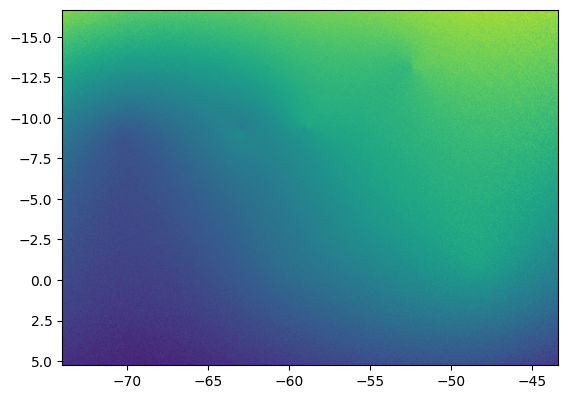

<Axes: >

In [ ]:
show(raster_pk)

In [ ]:
# Raster de máscara
out_meta = raster_pk.meta.copy()
out_img, out_transform = rio.mask.mask(raster_pk, gdf.geometry, crop = True)

/usr/local/lib/python3.9/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.9/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


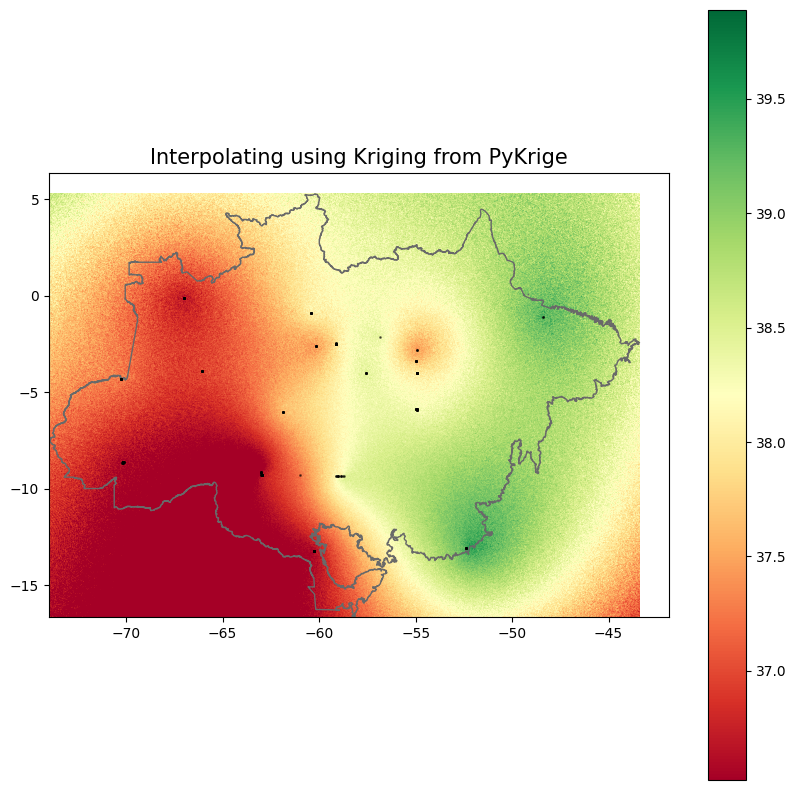

In [ ]:
# Plot data
fig, ax = plt.subplots(1, figsize = (10, 10), dpi=100)
raster = show(raster_pk, ax = ax, cmap = "RdYlGn", vmin=df_final['predict'].min(),vmax=df_final['predict'].max())
im = raster.get_images()[0]
fig.colorbar(im, ax=ax)
ax.plot(x, y, 'k.', markersize = 2, alpha = 0.5)
gdf.plot(ax = ax, color = 'none', edgecolor = 'dimgray')

plt.gca().invert_yaxis()

# Set title
ax.set_title('Interpolating using Kriging from PyKrige', fontdict = {'fontsize': '15', 'fontweight' : '3'})

# Display plot
plt.show()